# A Gentle Introduction to t-Distributed Stochastic Neighbor Embedding 


The t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a **probablistic** one. 

It was proposed by Maaten & Hinton in 2008.

http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf


       Main Idea - The t-SNE minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.


Essentially what this means is that it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions. 

The t-SNE tries to **preserve the distances in a neighborhood**. It differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. 


## How does the t-SNE Algorithm work?

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high-dimensional space and in the low-dimensional space. Then, it tries to optimize these two similarity measures using a cost function. 

We describe t-SNE in three steps.

- Step 1: Measure similarities between points in the high-dimensional space. 

Consider a set of data points scattered on a 2D space (Figure below). In practice, this should a high-dimensinal data distribution. We want to determine the pairwise **similarity** between $x_i$ and $x_j$.

To compute pairwise similarity we center a Gaussian distribution over each each data point ($x_i$). Note that the Euclidean distances between the pairwise points are considered to be normally distributed with mean of the point location (i.e., $x_i$) and variance $\sigma_i$ (defined by the user). Then, we convert the high-dimensional Euclidean distances between datapoints into conditional probabilities that represent similarities between $x_i$ and $x_j$.

<img src="https://cse.unl.edu/~hasan/Pics/TSNE-GaussianDistribution.png" width=400 height=200>


The **similarity** of datapoint $x_j$ to datapoint $x_i$ is the conditional probability $p_{j|i}$. Mathematically, the conditional probability $p_{j|i}$ is given by:

$p_{j|i} =  \frac{e^{\frac{-|| x_i - x_j ||^2}{2\sigma_i^2}}}{\sum_{k \neq i}e^{\frac{-|| x_i - x_k ||^2}{2\sigma_i^2}}} $



The conditional probability $p_{j|i}$ tells that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$. 

- For nearby datapoints, $p_{j|i}$ is relatively high, whereas 
- for widely separated datapoints, $p_{j|i}$ will be almost infinitesimal (for reasonable values of the variance of the Gaussian $\sigma_i$). 



We can increase/decrease the number of neighbors by changing the variance $\sigma_i$:
- $\sigma_i \rightarrow 0$: include just the closest one.
- $\sigma_i \rightarrow \infty$: include all neighbors.


<img src="https://cse.unl.edu/~hasan/Pics/TSNE-Conditional_Probability.png" width=400 height=200>


Thus, if data points $x_i$ and $x_j$ have equal values under this gaussian circle then their proportions and similarities are equal. Hence we have local similarities in the structure of this high-dimensional space. 


Using the conditional probabilities we define the **joint probabilities** $p_{ij}$ in the high-dimensional space. 
The use joint probabilities simplify the optimization of the cost function (defined in step 3).


We define joint probabilities as symmetrized conditional probabilities:

$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$

This ensures that for all datapoints $x_i$:

$\sum_{j}p_{ij} > \frac{1}{2n}$

As a result each datapoint $x_i$ makes a significant contribution to the cost function of the optimization problem (defined in step 3).


The Gaussian distribution or circle (i.e., number of neighbors) can be controlled by the variance of the distribution (circle size).

#### Setting the Variance $\sigma_i$ of the Gaussian Centered over each Datapoint $x_i$

It is not likely that there is a single value of $\sigma_i$ that is optimal for all datapoints in the data set. Because the density of the data is likely to vary. In dense regions, a smaller value of $\sigma_i$ is usually more appropriate than in sparser regions. 

<img src="https://cse.unl.edu/~hasan/Pics/TSNE-Dense-Sparse-Distribution.png" width=600 height=400>


We determine $\sigma_i$ based on a metric called **perplexity**. It is related to the number of nearest neighbors. 

$Perp(P_i) = 2^{H(P_i)}$

Here $H(P_i)$ is the Shannon entropy of $P_i$ measured in bits:

$H(P_i) = -\sum_{j} p_{j|i}log_2 p_{j|i}$ 

Any particular value of $\sigma_i$ induces a probability distribution $P_i$ over all of the other datapoints. This distribution has an entropy which increases as $\sigma_i$ increases. 

Finding a suitable value of perplexity is non-trivial. We discuss this issue later in detail. Briefly, an empirically effective range for perplexity is between 5 and 50.


- Step 2: Construct a probability distribution in the lower dimensional space

We compute the joint probabilities ($q_{ij}$) for the low-dimensional counterparts $y_i$ and $y_j$ of the high-dimensional datapoints $x_i$ and $x_j$. However, instead of using a Gaussian distribution we use a **Student t-distribution** with one degree of freedom. It is also known as the Cauchy distribution. Using this distribution, the joint probabilities $q_{ij}$ are defined as:

$q_{ij} =  \frac{(1+|| y_i - y_j ||^2)^{-1}}{\sum_{k \neq l}(1+|| y_k - y_l ||^2)^{-1}} $


<img src="https://cse.unl.edu/~hasan/Pics/TSNE-StudentTDistribution.png" width=500 height=300>

The rationale for using Student t-distribution instead of Gaussian distribution in low-dimensional space is given later. Briefly, the Student t-distribution has **heavier tails than the normal distribution**. The heavy tails allow for better modeling of **far apart distances**.



- Step 3: Ensure that the two probability distributions are as similar as possible.

We want to make sure that set of joint probabilities from the low-dimensional space ($q_{ij}$) to reflect those of the high dimensional space ($p_{ij}$) as best as possible. If the mapped points $y_i$ and $y_j$ correctly model the similarity between the high-dimensional datapoints $x_i$ and $x_j$, the joint probabilities $p_{ij}$ and $q_{ij}$ will be equal. Thus, we try to find a low-dimensional data representation that minimizes the mismatch between $p_{ij}$ and $q_{ij}$. A natural measure of the faithfulness with which $q_{j|i}$ models $p_{j|i}$ is the **Kullback-Leibler divergence** (which is in this case equal to the cross-entropy up to an additive constant). 

We minimize a single Kullback-Leibler divergence between a joint probability distribution $P$ in the high-dimensional space and a joint probability distribution $Q$ in the low-dimensional space using a **gradient descent method**. The cost function $C$ is given by:

$C =  KL (P || Q) = \sum_{i} \sum_{j} p_{ij} log \frac{p_{ij}}{q_{ij}}$



#### Why do we use Student t-distribution in Low-Dimension?

There are several reasons why the pairwise distances in a 2D map **cannot faithfully model distances** between points on a high-dimensional manifold.

Consider that we have some data points that have 10 intrinsic dimensions, but are represented in a much higher dimensional space and we want to reduce it to 2D. It is possible that if the number of data points is small (e.g., 11) then there is no reliable way to map the data points in 2D.

Furthermore, consider two sets of data points in high dimension: set A and set B. The area used by a set A in high-dimension is larger whereas the area used by set B is smaller. However, when we map data points from these two sets in 2D, there won't be much difference between the areas in the mapped points from the two sets.

This is due to the fact that **size scales up exponentially** as dimensions increase. The volume of a sphere centered on datapoint $i$ scales as $r^m$, where $r$ is the radius and $m$ the dimensionality of the sphere. Thus, if the datapoints are approximately uniformly distributed in the region around $i$, then a sphere in n-dimensions will occupy much more space than a sphere in 2D, even with the same radius. So, the data in 2D tend to be **crowded** together. This is known as the "crowding problem". This is a result of the curse of dimensionality. 

To alleviate this problem we need to increase the distance of the points in lower-dimensional space. This can be done by using a fat-tail distribution in low dimension.

Since we are comparing the probabilities of the data points and not the actual distances, one natural way to overcome the crowding problem is to consider distributions with fatter tails than Gaussian. One such distribution is the **Student-t distribution**. This works because when the **tails are fatter**, the distance of the points in the lower dimensional space is much bigger compared to when the tails are normally distributed. That is why in low-dimension we use Student-t distribution, instead og Gaussian distribution.


In t-SNE, we employ a Student t-distribution with one degree of freedom (which is the same as a Cauchy distribution) as the heavy-tailed distribution in the low-dimensional map. Using this distribution, the joint probabilities $q_{ij}$ are defined as

$q_{ij} =  \frac{(1+|| y_i - y_j ||^2)^{-1}}{\sum_{k \neq l}(1+|| y_k - y_l ||^2)^{-1}} $


We use Student t-distribution with a single degree of freedom, because it has the particularly  nice property that $(1+|| y_i - y_j ||^2)^{-1}$ approaches an inverse square law for large pairwise distances $|| y_i - y_j ||$ in the low-dimensional map. This makes the map’s representation of joint probabilities (almost) invariant to changes in the scale of the map for map points that are far apart. It also means that large clusters of points that are far apart interact in just the same way as individual points, so the optimization operates in the same way at all but the finest scales. 


Note that Student t-distribution is an infinite mixture of Gaussians. A **computationally convenient property** is that it is much faster to evaluate the density of a point under a Student t-distribution than under a Gaussian because it does not involve an exponential, even though the Student t-distribution is equivalent to an infinite mixture of Gaussians with different variances.

## How to Use t-SNE Effectively


The t-SNE algorithm is extremely useful for visualizing high-dimensional data. However, the t-SNE plots can sometimes be mysterious or misleading. The following link provides a good analysis of the effects of the parameters (e.g., perplexity, number of iterations, etc.) on the t-SNE plots.

https://distill.pub/2016/misread-tsne/

We summarize a set of condensed observations to optimize the performance of t-SNE.

- Expediting the running-time
- Setting perplexity
- Setting the number of iterations
- Interpreting low-dimensional cluster size 
- Interpreting inter-cluster distance


#### Expediting the Running-time

The t-SNE algorithm is very slow on larger dataset. To expedite its speed, we may first reduce the dimension of the data.

We could use linear dimensionality reduction technique PCA or non-linear technique such as Autoencoder and use the low-dimensional dataset as input for t-SNE.

Note that PCA is great at separating signal from noise. We could plot the percentage of variance explained by Principal Components (PCs) as follows and determine the number of PCs we want to use for generating a low-dimensional dataset to train t-SNE.


<img src="https://cse.unl.edu/~hasan/Pics/PCA-ExplainedVariance.png" width=600 height=400>


#### Setting Perplexity


Perplexity is related to the number of **nearest neighbors**. 

Perplexity **increases monotonically** with the variance $\sigma_i$ of the Gaussian that is centered over each high-dimensional datapoint $x_i$.

Note that t-SNE tries to **preserve the distances in a neighborhood**. Perplexity facilitates this by making a guess about the number of close neighbors each point has. It provides a way to **balance attention between local and global aspects of the data**.

- Very small Perplexity (<5): Smaller variance, hence ver few neighbors. This results into the creation of many small lumps of data. Tiny local variations would dominate.

- Very large Perplexity (>= size of the data): There will be unexpected behavior. Due to larger variance (larger radius of the Gaussian circle), larger number of distant points will have cumulative attrative force resulting into the collapse of local clusters. 



#### Setting the Number of Iterations

Empirically it has been shown that there is no fixed number of iterations that yields a stable result. Different datasets can require different numbers of iterations to converge. In general, we should have larger number of iterations (couple of thousands) for good convergence.


#### Interpreting Low-Dimensional Cluster Size 

Although the cluster sizes in the high-dimensional dataset may vary significantly, in low-dimensional t-SNE plot they look about same size. This is because t-SNE algorithm adapts its notion of “distance” to regional density variations in the dataset. As a result, it naturally expands dense clusters, and contracts sparse ones, evening out cluster sizes. Thus, we cannot see relative sizes of clusters in a t-SNE plot.

#### Interpreting Inter-Cluster Distance
The distances between well-separated clusters in a t-SNE plot may mean nothing.

## t-SNE: Key Benefits

- Revealing the structure at many scales on a single map.
- Revealing data that lie in multiple, different, manifolds or clusters.
- Reducing the tendency to crowd points together at the center.


## t-SNE: Key Limitations

- t-SNE is **computationally expensive**, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes.
- The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.
- The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.
- Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using init='pca').

The Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space is minimized by gradient descent. Note that the KL divergence is **not convex**, i.e., multiple restarts with different initializations will end up in local minima of the KL divergence. Hence, it is sometimes useful to try different seeds and select the embedding with the lowest KL divergence.


## t-SNE: Applications

The t-SNE can be used in areas like climate research, computer security, bioinformatics, cancer research, etc. The t-SNE could be used on high-dimensional data and then the output of those dimensions become inputs to some other classification model.

Also, t-SNE could be used to investigate, learn, or evaluate segmentation. Often times we select the number of segments prior to modeling or iterate after results. t-SNE can often times show clear separation in the data. This can be used prior to using our segmentation model to select a cluster number or after to evaluate if our segments actually hold up. t-SNE however is not a clustering approach since it does not preserve the inputs like PCA and the values may often change between runs. So, it is purely for exploration.


## Scikit-Learn Implementation of t-SNE: Barnes-Hut Algorithm

Scikit-Learn implements the Barnes-Hut t-SNE. It's time-complexity is $O(dNlogN)$ which is faster than the exact method that has complexity is $O(dN^2)$. The Barnes-Hut implementation only works when the target dimensionality is 3 or less. 

    For visualization purpose (which is the main use case of t-SNE), using the Barnes-Hut method is strongly recommended.


##### Note that failing to visualize well separated homogeneously labeled groups with t-SNE in 2D does not necessarily imply that the data cannot be correctly classified by a supervised model. It might be the case that 2 dimensions are not low enough to accurately represent the internal structure of the data.


We will use sklearn.manifold.TSNE object to visualize a high-dimensional manifold in 2D.

Below is a list of key hyperparameters. For the full list, see:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


- n_components int, optional (default: 2)

        Dimension of the embedded space.

- perplexity float, optional (default: 30)

        The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

- early_exaggeration float, optional (default: 12.0)

        Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. For larger values, the space between natural clusters will be larger in the embedded space. Again, the choice of this parameter is not very critical. If the cost function increases during initial optimization, the early exaggeration factor or the learning rate might be too high.

- learning_ratef loat, optional (default: 200.0)

        The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.

- n_iter int, optional (default: 1000)

        Maximum number of iterations for the optimization. Should be at least 250.

- n_iter_without_progressint, optional (default: 300)

        Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. Note that progress is only checked every 50 iterations so this value is rounded to the next multiple of 50.



- initstring or numpy array, optional (default: “random”)

        Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.

- verbose int, optional (default: 0)

        Verbosity level.

- random_state int, RandomState instance or None, optional (default: None)

        If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. Note that different initializations might result in different local minima of the cost function.

- method string (default: ‘barnes_hut’)

        By default the gradient calculation algorithm uses Barnes-Hut approximation running in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. However, the exact method cannot scale to millions of examples.


## Experimemts

For an empirical understanding of the t-SNE algorithm, we perform 3 experiments.

- Experiment 1: Compare t-SNE with PCA by Visualizing a Non-Linear Manifold in 2D
- Experiment 2: Effect of Varying Perplexity
- Experiment 3: Effect of Varying the Number of Iterations


For a good discussion of the effects of various parameters, as well as interactive plots to explore those effects, see the link below:

https://distill.pub/2016/misread-tsne/

In [1]:
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_swiss_roll

from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

## Synthetic Dataset Representing a Non-linear Manifold

We use a swiss roll toy dataset, which is a non-linear 2D manifold.

We use Scikit-Learn's "datasets.make_swiss_roll" function to generate the dataset that is suitable for investigating non-linear dimensionality reduction.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html

The following two parameters are used by the make_swiss_roll function:

- n_samples : The number of sample points on the S curve.

- noise : Standard deviation of Gaussian noise added to the data.

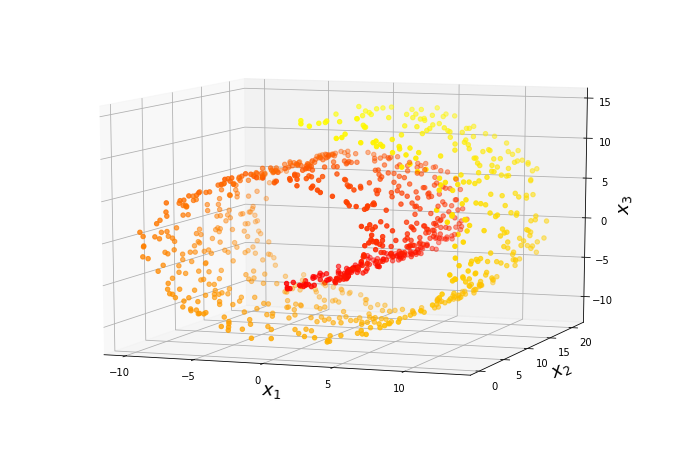

In [2]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=20,cmap=plt.cm.autumn)

ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.show()

## Experiment 1: Compare t-SNE with PCA by Visualizing a Non-Linear Manifold in 2D

In [3]:
tsne = TSNE(n_components=2, random_state=42)
%time X_reduced_tsne = tsne.fit_transform(X)

pca = PCA(n_components=2)
%time X_reduced_pca = pca.fit_transform(X)

CPU times: user 6.92 s, sys: 352 ms, total: 7.27 s
Wall time: 6.26 s
CPU times: user 87 ms, sys: 12.7 ms, total: 99.6 ms
Wall time: 36.6 ms


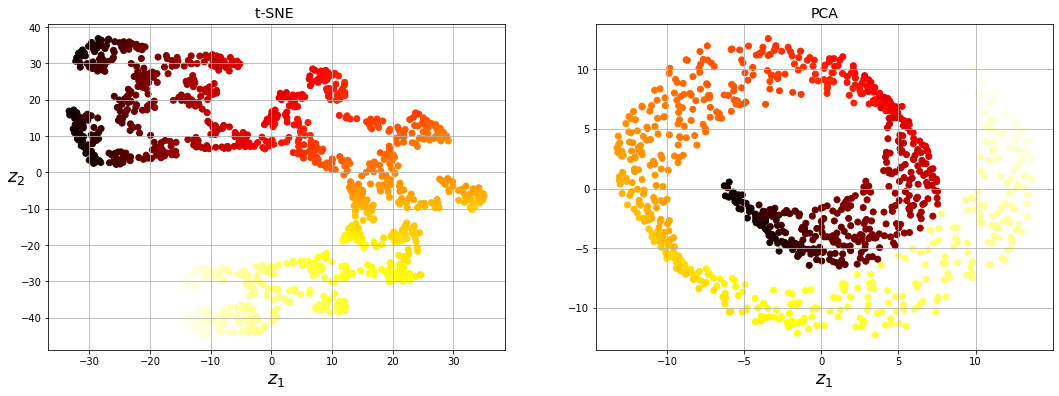

In [4]:
titles = ["t-SNE ", "PCA"]

plt.figure(figsize=(18,6))

for subplot, title, X_reduced in zip((121, 122), titles,
                                     (X_reduced_tsne, X_reduced_pca)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 121:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.show()

## Experiment 1: Observation

We see that PCA is unable to unroll the dataset. In other words, PCA preserves large pairwise distances resulting into "distant points" becoming closer in 2D (because those points were closer according to Euclidean distance in high-dimension).

On the other hand, t-SNE preserves only small pairwise distances or local similarities.

## Experiment 2: Effect of Varying the Perplexity

In [5]:
tsne_perplexity5 = TSNE(n_components=2, perplexity=5, random_state=42)
%time X_reduced_tsne_perplexity5 = tsne_perplexity5.fit_transform(X)

tsne_perplexity15 = TSNE(n_components=2, perplexity=15, random_state=42)
%time X_reduced_tsne_perplexity15 = tsne_perplexity15.fit_transform(X)

tsne_perplexity30 = TSNE(n_components=2, perplexity=30, random_state=42)
%time X_reduced_tsne_perplexity30 = tsne_perplexity30.fit_transform(X)

tsne_perplexity50 = TSNE(n_components=2, perplexity=50, random_state=42)
%time X_reduced_tsne_perplexity50 = tsne_perplexity50.fit_transform(X)

tsne_perplexity100 = TSNE(n_components=2, perplexity=100, random_state=42)
%time X_reduced_tsne_perplexity100 = tsne_perplexity100.fit_transform(X)

tsne_perplexity150 = TSNE(n_components=2, perplexity=150, random_state=42)
%time X_reduced_tsne_perplexity150 = tsne_perplexity150.fit_transform(X)

CPU times: user 5.31 s, sys: 74.8 ms, total: 5.38 s
Wall time: 5.75 s
CPU times: user 6.28 s, sys: 336 ms, total: 6.61 s
Wall time: 6.52 s
CPU times: user 7.44 s, sys: 434 ms, total: 7.87 s
Wall time: 7.01 s
CPU times: user 8.52 s, sys: 356 ms, total: 8.88 s
Wall time: 7.79 s
CPU times: user 10.5 s, sys: 123 ms, total: 10.6 s
Wall time: 9.32 s
CPU times: user 13.5 s, sys: 914 ms, total: 14.4 s
Wall time: 13.3 s


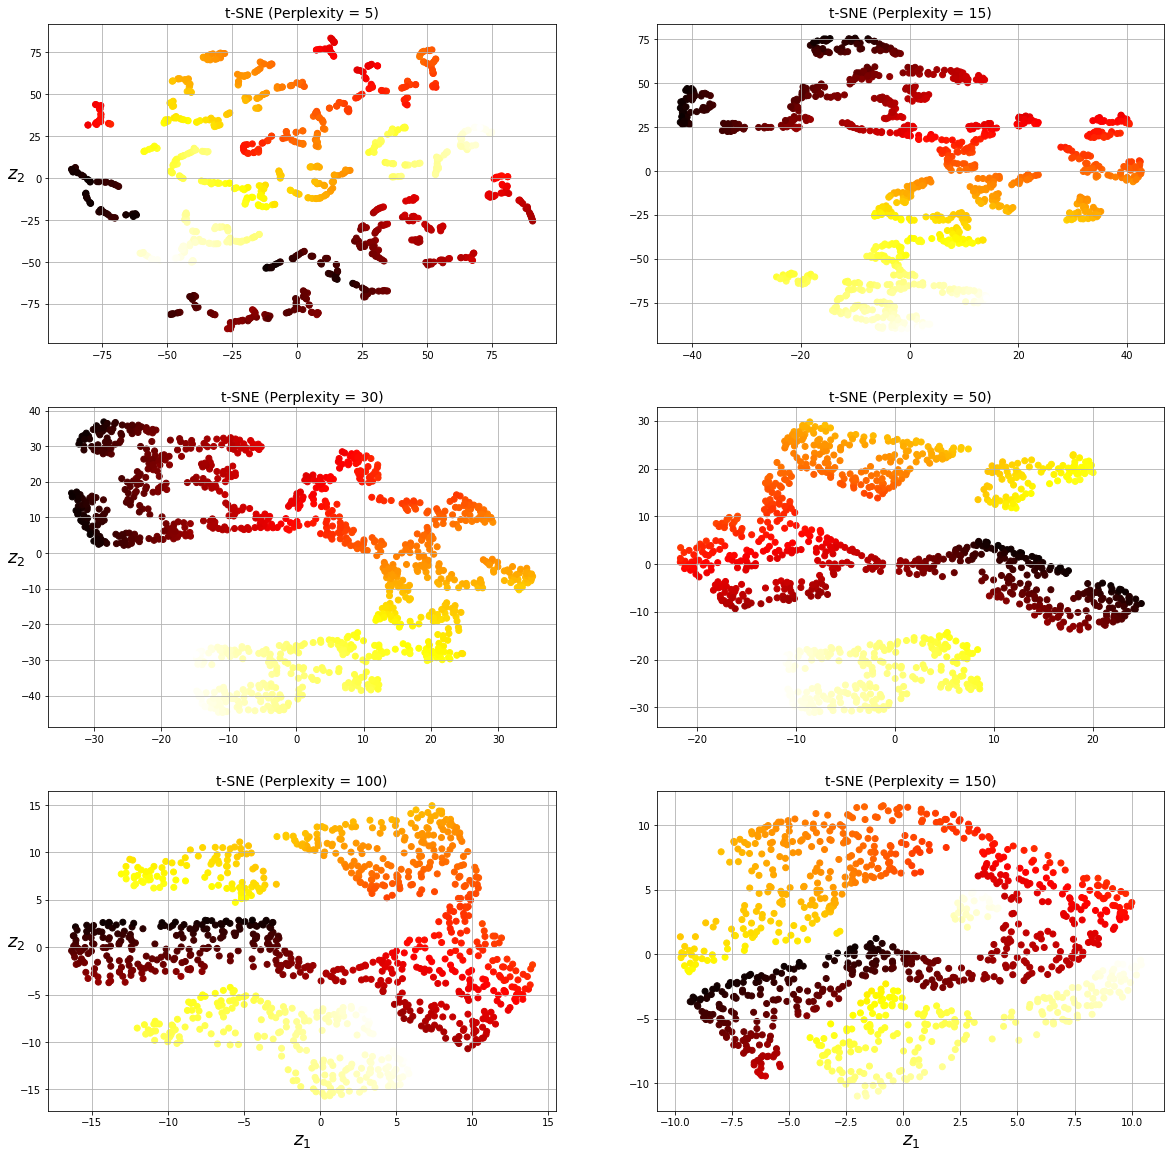

In [6]:
titles = ["t-SNE (Perplexity = 5)", "t-SNE (Perplexity = 15)", "t-SNE (Perplexity = 30)",
         "t-SNE (Perplexity = 50)", "t-SNE (Perplexity = 100)", "t-SNE (Perplexity = 150)"]

plt.figure(figsize=(20,20))

for subplot, title, X_reduced in zip((321, 322, 323, 324, 325, 326), titles,
                                     (X_reduced_tsne_perplexity5, X_reduced_tsne_perplexity15, X_reduced_tsne_perplexity30,
                                     X_reduced_tsne_perplexity50, X_reduced_tsne_perplexity100, X_reduced_tsne_perplexity150)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    if subplot == 325 or subplot == 326:
        plt.xlabel("$z_1$", fontsize=18)
    if subplot == 321 or subplot == 323 or subplot == 325:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.show()

## Experiment 2: Observation

We see that as the **perplexity increases we get more and more stable configuration**. 

The default perplexity 30 gives a good enough visualization.

Note that the value of perplexity should always be less than the total number of points as when they become equal the algorithm fails and we get unexpected behaviour.

See the following Scikit-Learn page for more experiments on the effect of varying perplexity:
https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

In [7]:
tsne_iter250 = TSNE(n_components=2, n_iter=250, random_state=42)
%time X_reduced_tsne_iter250 = tsne_iter250.fit_transform(X)

tsne_iter500 = TSNE(n_components=2, n_iter=500, random_state=42)
%time X_reduced_tsne_iter500 = tsne_iter500.fit_transform(X)

tsne_iter1000 = TSNE(n_components=2, n_iter=1000, random_state=42)
%time X_reduced_tsne_iter1000 = tsne_iter1000.fit_transform(X)

tsne_iter2000 = TSNE(n_components=2, n_iter=2000, random_state=42)
%time X_reduced_tsne_iter2000 = tsne_iter2000.fit_transform(X)

CPU times: user 2.14 s, sys: 106 ms, total: 2.24 s
Wall time: 1.66 s
CPU times: user 4.13 s, sys: 210 ms, total: 4.34 s
Wall time: 3.29 s
CPU times: user 6.81 s, sys: 308 ms, total: 7.12 s
Wall time: 6.05 s
CPU times: user 12.8 s, sys: 590 ms, total: 13.4 s
Wall time: 12.4 s


## Experiment 3: Effect of Varying the Number of Iterations

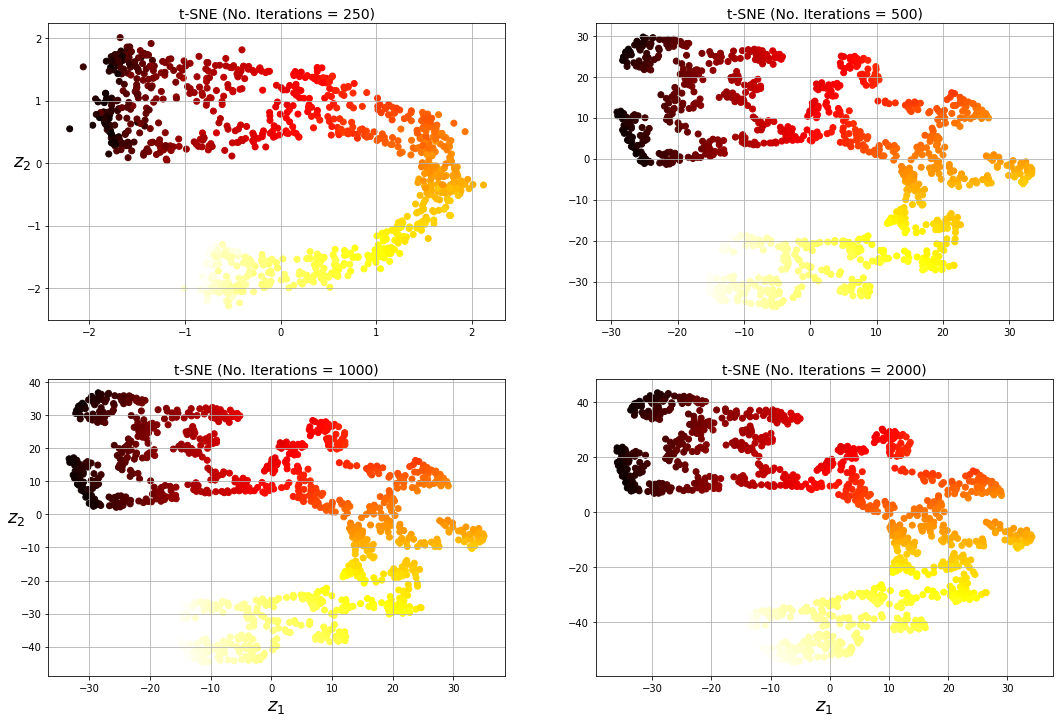

In [8]:
titles = ["t-SNE (No. Iterations = 250)", "t-SNE (No. Iterations = 500)",
         "t-SNE (No. Iterations = 1000)", "t-SNE (No. Iterations = 2000)"]

plt.figure(figsize=(18,12))

for subplot, title, X_reduced in zip((221, 222, 223, 224), titles,
                                     (X_reduced_tsne_iter250, X_reduced_tsne_iter500,
                                     X_reduced_tsne_iter1000, X_reduced_tsne_iter2000)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    if subplot == 223 or subplot == 224:
        plt.xlabel("$z_1$", fontsize=18)
    if subplot == 221 or subplot == 223:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.show()

## Experiment 3: Observation

We don't observe much difference by increasing the number of iterations.

Note that t-SNE is an iterative process. The differences between samples are continually refined. We can set a limit on the maximum number of iterations to be performed. For large datasets, this might speed up the time taken to get an answer, but for the most part, we should leave this set to the default of 1000.